In [12]:
import requests
import json
import numpy 
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import random


from config import api_key
from citipy import citipy



In [13]:
farTemp =  []
humidity = []
windSpeed = []
clouds = []
cityName= []
latitude = []
longitude = []
latAbs = []
colors = []



def getTempCity(city, country):
        
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    
    units = "imperial"
    
    query_url = url  + "q=" + city + "&units=" + units + "&appid=" + api_key
    
    #query_url = url  + "lat=" + "{:.2f}".format(lat) + "&" + "lon=" + "{:.2f}".format(lon)+ "&appid=" + api_key
    #print(query_url)
    
    response = requests.get(query_url).json()
    #if response.status_code != 200:
    #    break
    
    # print(json.dumps(response, indent=4))
    
#def testFun():
    err_flg = False
    try:
        latitude.append(response["coord"]["lat"])
    except KeyError:
        err_flg = True
    if not err_flg:    
        longitude.append(response["coord"]["lon"])
        latAbs.append(abs(response["coord"]["lat"]))

        if float(response["coord"]["lat"]) >= 0.0:
            colors.append("blue")
        else:
            colors.append("red")


        #kTemp = response["main"]["temp_max"]
        ## Convert Kelvin to Farenheit
        #farTemp.append(  9/5 * (kTemp - 273) + 32)
        
        farTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        cityName.append(response["name"])

    #print("TestTest")
    #print(latAbs)
    #print(colors)
    #print(f"city man: {cityName}")
    
    #print(latitude)
    #print(longitude)
    #print(farTemp)
    #print(humidity)
    #print(windSpeed)
    #print (clouds)


In [14]:
###### Main loop
#print("b4 loop")
for i in range(500):
#for i in range(1):
    latRand = round(random.uniform(-90,90), 2)
    lonRand = round(random.uniform(-180,180), 2)
    #print(f"lat {latRand} lon {lonRand}")
    city = citipy.nearest_city(latRand, lonRand)
    #print(f"cityboy {city.city_name}")
    getTempCity(city.city_name, city.country_code)
    #print(f"city man: {cityName[i]}")


##########
#print("after loop")
weather_df = pd.DataFrame({
    "City": cityName,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temp": farTemp,
    "Humidity": humidity,
    "Wind Speed": windSpeed,
    "Clouds": clouds,
    "Abs Latitude": latAbs,
    "Colors": colors
})
    
#print(f"weather_df: {weather_df[0]} ")


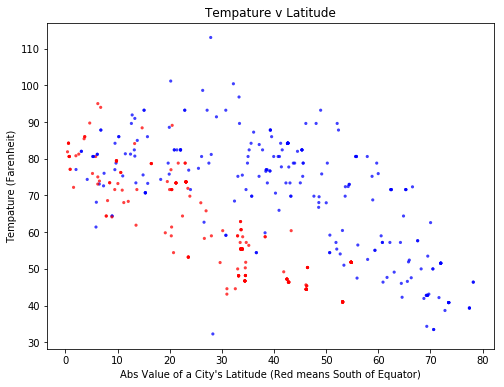

In [15]:
### Plot the scatter chart
#x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
#x_axis = np.arange(0, x_limit, 1)
x_axis = weather_df["Abs Latitude"]

####
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


####


plt.scatter(x_axis, weather_df["Temp"], marker="o", facecolors=weather_df["Colors"], edgecolors="none",
            s=10, alpha=0.75)

plt.title("Tempature v Latitude")
plt.xlabel("Abs Value of a City's Latitude (Red means South of Equator)")
plt.ylabel("Tempature (Farenheit)")

#plt.savefig("./TempLat.png")

plt.show()

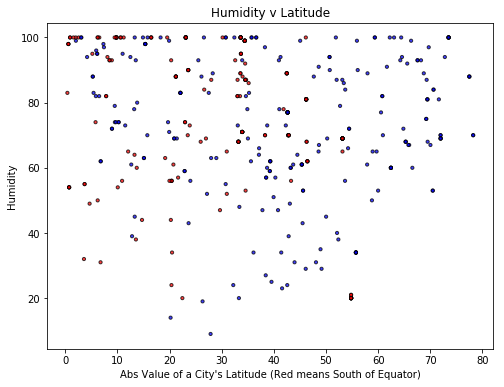

In [16]:
x_axis = weather_df["Abs Latitude"]

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


plt.scatter(x_axis, weather_df["Humidity"], marker="o", facecolors=weather_df["Colors"], edgecolors="black",
            s=10, alpha=0.75)

plt.title("Humidity v Latitude")
plt.xlabel("Abs Value of a City's Latitude (Red means South of Equator)")
plt.ylabel("Humidity")

#plt.savefig("./HumLat.png")

plt.show()

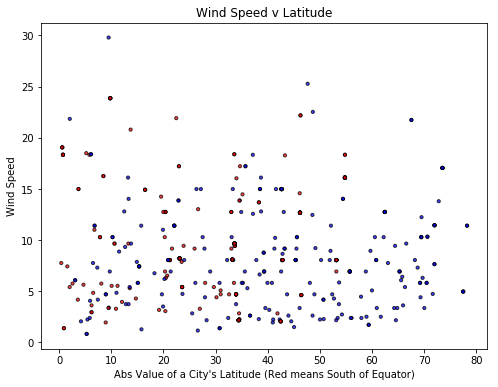

In [17]:
x_axis = weather_df["Abs Latitude"]

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


plt.scatter(x_axis, weather_df["Wind Speed"], marker="o", facecolors=weather_df["Colors"], edgecolors="black",
            s=10, alpha=0.75)

plt.title("Wind Speed v Latitude")
plt.xlabel("Abs Value of a City's Latitude (Red means South of Equator)")
plt.ylabel("Wind Speed")

#plt.savefig("./Wind SpeedLat.png")

plt.show()

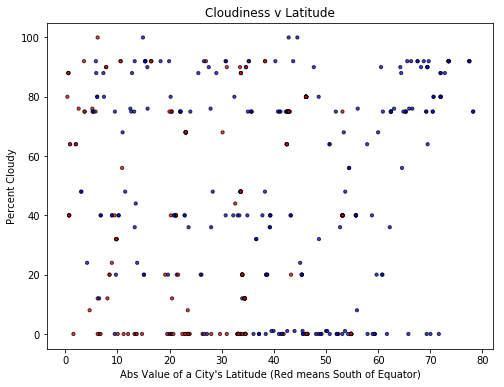

In [18]:
x_axis = weather_df["Abs Latitude"]

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


plt.scatter(x_axis, weather_df["Clouds"], marker="o", facecolors=weather_df["Colors"], edgecolors="black",
            s=10, alpha=0.75)

plt.title("Cloudiness v Latitude")
plt.xlabel("Abs Value of a City's Latitude (Red means South of Equator)")
plt.ylabel("Percent Cloudy")

#plt.savefig("./Wind SpeedLat.png")

plt.show()

In [19]:
weather_df

,Abs Latitude,City,Clouds,Colors,Humidity,Latitude,Longitude,Temp,Wind Speed
0,53.16,Punta Arenas,40,red,69,-53.16,-70.91,41.00,8.05
1,28.97,Bushehr,88,blue,63,28.97,50.84,91.40,6.93
2,30.97,Carnarvon,0,red,65,-30.97,22.13,43.13,5.08
3,53.16,Punta Arenas,40,red,69,-53.16,-70.91,41.00,8.05
4,39.31,Port Elizabeth,40,blue,62,39.31,-74.98,87.80,6.93
5,20.37,Khorixas,0,red,24,-20.37,14.96,61.40,3.06
6,43.07,Madison,75,blue,49,43.07,-89.38,73.40,12.75
7,0.60,Hithadhoo,88,red,98,-0.60,73.08,84.22,19.06
8,8.96,Lebu,40,blue,72,8.96,38.73,64.40,4.70
9,26.98,San Patricio,92,red,69,-26.98,-56.83,65.81,3.29
